# Testing Notebook - Regression Tree

TODO:
- [ ] create random regressions datasets for testing
- [ ] run training and prediction on these datasets and collect statistics
- [ ] same as 3 but with the scikit regression tree
- [ ] try a bunch of different settings, most likely use grid search with cross validation
- [ ] visualize the results

In [31]:
from scripts.regression_tree import RegressionTree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


RANDOM_STATE = 42

## Helper functions

In [32]:
"""Generate synthetic regression data using scikit-learn's make_regression function."""
def generate_regression_data(n_samples=100, n_features=1, noise=0.1, random_state=RANDOM_STATE):
  X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=noise, random_state=random_state)
  print("Generated regression data with {} samples and {} features.".format(n_samples, n_features))
  print("First 5 samples of X:\n", X[:5])
  print("First 5 samples of y:\n", y[:5])
  return X, y

## Definition of testing configurations

In [33]:
TESTING_CONFIGS = [
  {
    "description": "Basic regression data with low noise",
    "n_samples": 100,
    "n_features": 1,
    "noise": 0.1
  },
  {
    "description": "Regression data with higher noise",
    "n_samples": 100,
    "n_features": 1,
    "noise": 10.0
  },
  {
    "description": "Regression data with multiple features",
    "n_samples": 200,
    "n_features": 5,
    "noise": 5.0
  },
  {
    "description": "Larger dataset with moderate noise",
    "n_samples": 5000,
    "n_features": 3,
    "noise": 2.0
  },
  {
    "description": "Large dataset with low noise",
    "n_samples": 10000,
    "n_features": 2,
    "noise": 0.5
  },
  {
    "description": "Large dataset with high noise",
    "n_samples": 10000,
    "n_features": 2,
    "noise": 20.0
  },
  {
    "description": "Moderate dataset with many features",
    "n_samples": 1000,
    "n_features": 50,
    "noise": 5.0
  }
]

## Runing the tests

For each configuration we will train the scikit-learn's built-in regression tree model as well as our implementation, we collect useful statistics and compare them.

In [34]:
results = []

for config in TESTING_CONFIGS:
    print("="*80)
    print("Testing configuration: {}".format(config["description"]))
    print("-"*80)
    # generate synthetic data
    X, y = generate_regression_data(
        n_samples=config["n_samples"],
        n_features=config["n_features"],
        noise=config["noise"]
    )
    
    models = {
        "our": RegressionTree(max_depth=5),
        "sklearn": DecisionTreeRegressor(max_depth=5)
    }
    
    print("-"*80)
    
    for model_name, model in models.items():
        cv_results = cross_validate(
            model,
            X,
            y,
            cv=5, # 5-fold cross-validation
            scoring=["r2", "neg_mean_squared_error", "neg_mean_absolute_error"],
            return_train_score=True
        )
        
        # aggregate stats
        r2_mean = np.mean(cv_results["test_r2"])
        r2_std = np.std(cv_results["test_r2"])
        
        mse_mean = -np.mean(cv_results["test_neg_mean_squared_error"])
        mae_mean = -np.mean(cv_results["test_neg_mean_absolute_error"])
        
        print(f"{model_name:8s} | R²: {r2_mean:.3f} ± {r2_std:.3f} | MSE: {mse_mean:.3f} | MAE: {mae_mean:.3f}")
        
        results.append({
            "dataset": config["description"],
            "model": model_name,
            "r2_mean": r2_mean,
            "r2_std": r2_std,
            "mse_mean": mse_mean,
            "mae_mean": mae_mean
        })
    

Testing configuration: Basic regression data with low noise
--------------------------------------------------------------------------------
Generated regression data with 100 samples and 1 features.
First 5 samples of X:
 [[ 0.93128012]
 [ 0.08704707]
 [-1.05771093]
 [ 0.31424733]
 [-0.47917424]]
First 5 samples of y:
 [ 38.9917296    3.4964533  -44.05770173  13.09112657 -19.9786311 ]
--------------------------------------------------------------------------------
our      | R²: 0.992 ± 0.007 | MSE: 11.996 | MAE: 1.889
sklearn  | R²: 0.992 ± 0.007 | MSE: 11.996 | MAE: 1.889
Testing configuration: Regression data with higher noise
--------------------------------------------------------------------------------
Generated regression data with 100 samples and 1 features.
First 5 samples of X:
 [[ 0.93128012]
 [ 0.08704707]
 [-1.05771093]
 [ 0.31424733]
 [-0.47917424]]
First 5 samples of y:
 [ 50.77992943 -10.06527016 -34.91839191  10.52674299 -17.73837724]
--------------------------------

## Results

In [35]:
df = pd.DataFrame(results)
df

,dataset,model,r2_mean,r2_std,mse_mean,mae_mean
0,Basic regression data with low noise,our,0.992358,0.007112,11.996396,1.888677
1,Basic regression data with low noise,sklearn,0.992358,0.007112,11.996396,1.888677
2,Regression data with higher noise,our,0.902321,0.027118,154.920074,10.069388
3,Regression data with higher noise,sklearn,0.902321,0.027118,154.920074,10.069388
4,Regression data with multiple features,our,0.820177,0.066302,1586.349071,31.288807
5,Regression data with multiple features,sklearn,0.829356,0.067289,1520.184985,30.728843
6,Larger dataset with moderate noise,our,0.949335,0.004258,469.500281,16.931095
7,Larger dataset with moderate noise,sklearn,0.949335,0.004258,469.500281,16.931095
8,Large dataset with low noise,our,0.993747,0.000464,60.142835,5.931587
9,Large dataset with low noise,sklearn,0.993747,0.000464,60.142835,5.931587


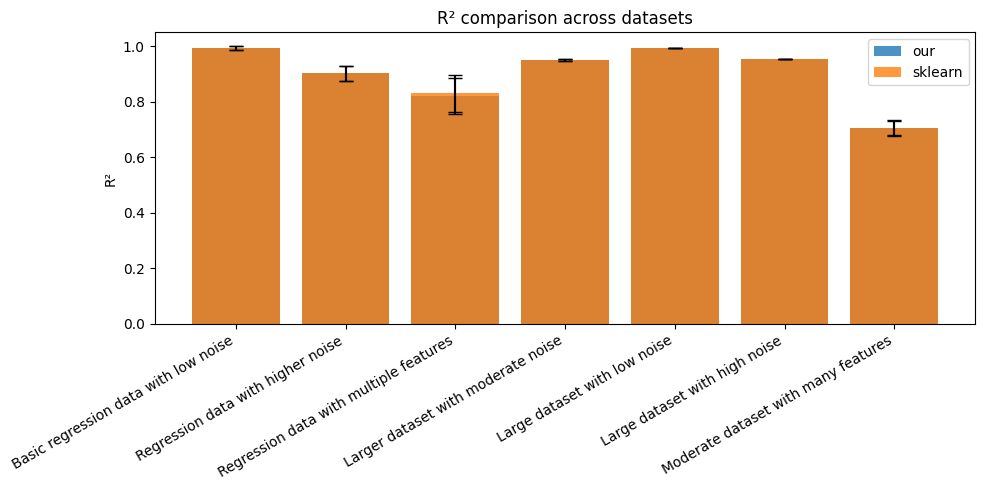

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

for model in df["model"].unique():
    sub = df[df["model"] == model]
    ax.bar(
        sub["dataset"],
        sub["r2_mean"],
        yerr=sub["r2_std"],
        capsize=5,
        label=model,
        alpha=0.8
    )

ax.set_ylabel("R²")
ax.set_title("R² comparison across datasets")
ax.legend()
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

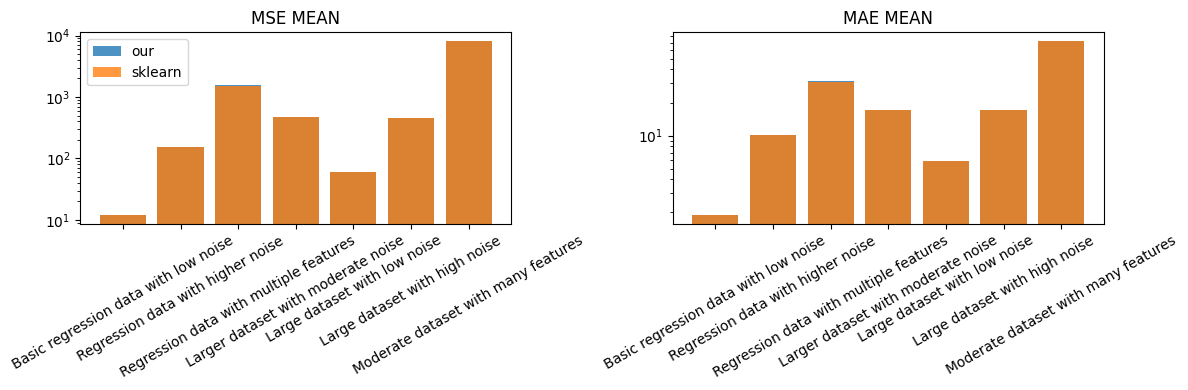

In [37]:
metrics = ["mse_mean", "mae_mean"]

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for ax, metric in zip(axes, metrics):
    for model in df["model"].unique():
        sub = df[df["model"] == model]
        ax.bar(
            sub["dataset"],
            sub[metric],
            label=model,
            alpha=0.8
        )
    ax.set_yscale("log")
    ax.set_title(metric.replace("_", " ").upper())
    ax.tick_params(axis="x", rotation=30)

axes[0].legend()
plt.tight_layout()
plt.show()